In [1]:
# dados
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings('ignore')

In [2]:
dados = yf.download("AAPL", 
                    start='2022-01-01',
                    end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
#dados = pd.DataFrame(dados)

In [4]:
dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510941,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400


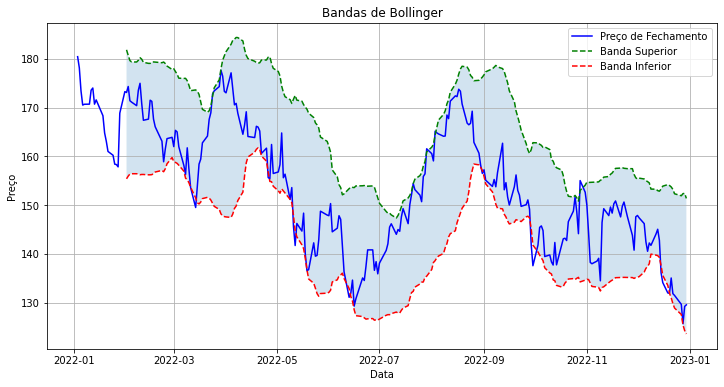

In [5]:
def bollinger_bands(dados, janela, num_desvios):
    rolling_mean = dados['Adj Close'].rolling(window=janela).mean()
    rolling_std = dados['Adj Close'].rolling(window=janela).std()
    
    upper_band = rolling_mean + num_desvios * rolling_std
    lower_band = rolling_mean - num_desvios * rolling_std
    
    return upper_band, lower_band

janela_tamanho = 21
num_desvios = 2

upper_band, lower_band = bollinger_bands(dados, janela_tamanho, num_desvios)

dados['Upper Band'] = upper_band
dados['Lower Band'] = lower_band

plt.figure(figsize=(12, 6))
plt.plot(dados.index, dados['Adj Close'], label='Preço de Fechamento', color='blue')
plt.plot(dados.index, dados['Upper Band'], label='Banda Superior', color='green', linestyle='dashed')
plt.plot(dados.index, dados['Lower Band'], label='Banda Inferior', color='red', linestyle='dashed')
plt.fill_between(dados.index, dados['Lower Band'], dados['Upper Band'], alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Bandas de Bollinger')
plt.legend()
plt.grid()
plt.show()

In [6]:
dados

,Open,High,Low,Close,Adj Close,Volume,Upper Band,Lower Band
Date,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900,NaN,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144287,99310400,NaN,NaN
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405685,94537600,NaN,NaN
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510941,96904000,NaN,NaN
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679489,86709100,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,152.323139,128.889361
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,151.920725,127.574870
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674026,85438400,152.352292,125.416902


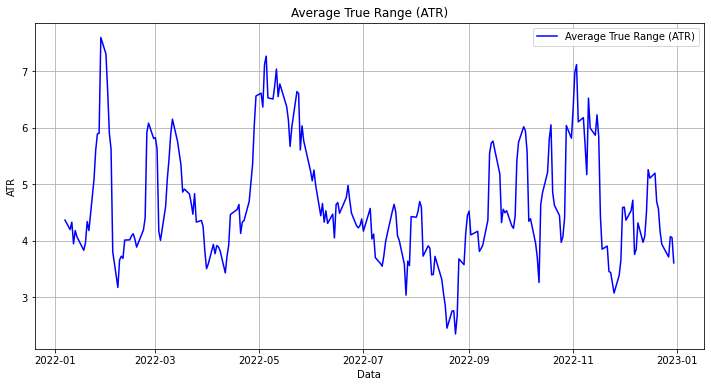

In [8]:
def true_range(high, low, close):
    tr1 = abs(high - low)
    tr2 = abs(high - close.shift())
    tr3 = abs(low - close.shift())

    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    
    return true_range

def average_true_range(data, janela):
    tr = true_range(data['High'], data['Low'], data['Adj Close'])
    atr = tr.rolling(window=janela).mean()
    
    return atr

# Cálculo do Average True Range (ATR)
janela_tamanho = 5
atr = average_true_range(df, janela_tamanho)

df['ATR'] = atr

# Plotagem do Average True Range (ATR)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ATR'], label='Average True Range (ATR)', color='blue')
plt.xlabel('Data')
plt.ylabel('ATR')
plt.title('Average True Range (ATR)')
plt.legend()
plt.grid()
plt.show()
